# Create Artificial Pretraining Data for Testing Purposes

* Main ideas:
    1. Read the largest data sample from california labeled samples (`/geosatlearn_app/ml_models/sits-bert/datafiles/california-labeled/Test.csv`);  
    2. Eliminate the labels from this sample in order to be used as pretraining dataset;
    3. Save processed data results in a new folder (`/geosatlearn_app/ml_models/sits-bert/datafiles/california-excluded-labels/Test.csv`) to be used in pretraining experiments;

## Initial Setup

In [ ]:
# Import packages.
import os

import numpy as np

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Read from Labeled Dataset

In [2]:
file_path = "/geosatlearn_app/ml_models/sits-bert/datafiles/california-labeled/Test.csv"

# Read into memory.
with open(file_path, "r") as ifile:
    data: list[str] = ifile.readlines()
    ts_num: list[str] = len(data)
    print(f">>> Loading data successful ... {ts_num} lines read.")

>>> Loading data successful ... 318588 lines read.


## Drop Labels From Dataset

In [3]:
# All processed lines will be stored here.
processed_data: list[str] = []

# Loop over all the instances in the data.
ts_sizes: list[int] = []
for line in tqdm(data, desc="Processing data ..."):

    # Remove `\n` from the end of the line.
    line_processed: str = line.strip()

    # Eliminate class label from the line.
    line_processed_list: list[str] = line_processed.split(",")[:-1]

    # Join the line back together.
    line_processed: str = ",".join(line_processed_list)

    # Number of timesteps in the line (10 bands + 1 doy).
    ts_num: int = len(line_processed_list) / 11

    # Append the number of timesteps to the list.
    ts_sizes.append(int(ts_num))

    # Fill the processed data list.\
    processed_data.append(line_processed)

# Save as numpy array.
ts_sizes: np.array = np.array(ts_sizes)

Processing data ...:   1%|█                                                                                                                | 3170/318588 [00:00<00:09, 31689.15it/s]

Processing data ...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 318588/318588 [00:09<00:00, 32769.45it/s]


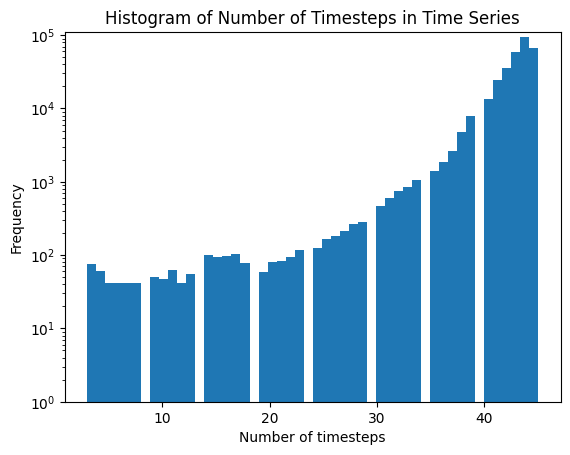

In [4]:
# Plot histogram of the number of timesteps.

plt.hist(ts_sizes, bins=50)
plt.xlabel("Number of timesteps")
plt.ylabel("Frequency")
plt.ylim(1, 110000)
plt.yscale("log")
plt.title("Histogram of Number of Timesteps in Time Series");

In [5]:
# Minimum and maximum number of timesteps. Also Mean and median.
print(f">>> Minimum number of timesteps: {ts_sizes.min()}")
print(f">>> Maximum number of timesteps: {ts_sizes.max()}")
print(f">>> Mean number of timesteps: {ts_sizes.mean()}")
print(f">>> Median number of timesteps: {np.median(ts_sizes)}")

>>> Minimum number of timesteps: 3
>>> Maximum number of timesteps: 45
>>> Mean number of timesteps: 42.703488518086054
>>> Median number of timesteps: 44.0


## Save Final Results

In [6]:
# Output file path.
output_file_path = (
    "/geosatlearn_app/ml_models/sits-bert/datafiles/california-excluded-labels/Test.csv"
)

# Create the output directory if it does not exist.
output_dir = os.path.dirname(output_file_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f">>> Created output directory: {output_dir}")

# Save results to a new csv file.
with open(output_file_path, "w") as ofile:
    for line in tqdm(processed_data, desc="Saving processed data ..."):
        ofile.write(f"{line}\n")

# Show the output file path.
print(f">>> Processed data saved to {output_file_path}.")

# Print the number of processed lines.
print(f">>> Total number of processed lines: {len(processed_data)}")

Saving processed data ...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 318588/318588 [00:00<00:00, 324536.08it/s]


>>> Processed data saved to /geosatlearn_app/ml_models/sits-bert/datafiles/california-excluded-labels/Test.csv.
>>> Total number of processed lines: 318588
